# Feature Engineering 

Feature Engineering is the process of transforming raw data into meaningful features that can be used as input for advanceced visualisations or machine learning algorithms.

It involves selecting, creating, and transforming features to hopefully enhance the dataset.

Poorly designed features can lead to a disruptive dataset. 


## Types of Feature Engineering

* **Handling Missing Values**

    Filling missing values with appropriate strategies, e.g., mean, median, or constant values.

* **Encoding Categorical Variables**

    Converting categorical data into numeric form, such as one-hot encoding or label encoding. Only needed if you are building a model

* **Binning Numeric Variables**

    Grouping continuous data into bins or categories to simplify the representation.

* **Feature Scaling**

    Scaling features to bring them to a similar range, e.g., Min-Max scaling or Standard scaling.

* **Creating New Features**

    Generating new features by combining or transforming existing ones.

* **Handling Outliers**

    Managing extreme values that can affect model performance.

* **Feature Joining**

    Creating new features by combining multiple existing features.

## Imports and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Andries\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("Cleaned_Data_CSV.csv", sep=';')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,41929,OH,250/500,1000,"1406,91",0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,38895,IN,250/500,2000,"1197,22",5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,36775,OH,100/300,2000,"1413,14",5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,33018,IL,250/500,2000,"1415,74",6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,41796,IL,500/1000,1000,"1583,91",6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


### Missing Values

In [4]:
null_counts = df.isnull().sum()
null_counts

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [5]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,41929,OH,250/500,1000,"1406,91",0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,38895,IN,250/500,2000,"1197,22",5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,36775,OH,100/300,2000,"1413,14",5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,33018,IL,250/500,2000,"1415,74",6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,41796,IL,500/1000,1000,"1583,91",6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


### Binding Numeric Data

In [6]:
df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_date,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.961000,546238.648000,37295.195000,1134.000000,1.101000e+06,501214.488000,25126.100000,-26793.700000,42034.335000,11.644000,1.83900,0.992000,1.487000,52767.27400,7434.838000,7398.483000,37928.950000,2005.103000
std,115.113174,9.126378,257063.005276,2687.464969,610.669237,2.297407e+06,71701.610941,27872.187708,28104.096686,17.235482,6.951373,1.01888,0.820127,1.111335,26352.43344,4880.714802,4824.636538,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,32881.000000,500.000000,-1.000000e+06,430104.000000,0.000000,-111100.000000,42005.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,34961.000000,500.000000,0.000000e+00,448404.500000,0.000000,-51500.000000,42019.000000,6.000000,1.00000,0.000000,1.000000,41962.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,37347.500000,1000.000000,0.000000e+00,466445.500000,0.000000,-23250.000000,42035.000000,12.000000,1.00000,1.000000,1.000000,57880.00000,6780.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,39559.500000,2000.000000,0.000000e+00,603251.000000,51025.000000,0.000000,42050.000000,17.000000,3.00000,2.000000,2.000000,70532.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,42057.000000,2000.000000,1.000000e+07,620962.000000,100500.000000,0.000000,42064.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


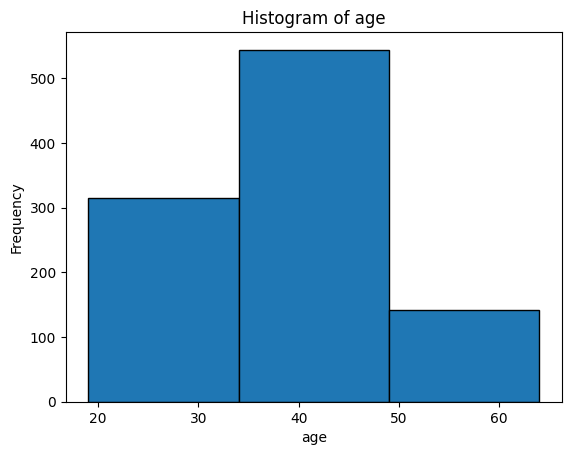

In [7]:
# Choose the column for the histogram
column_name = 'age'

# Plot the histogram
plt.hist(df[column_name], bins=3, edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display the histogram
plt.show()

In [8]:
bin_edges = [0, 30, 55, 100]  # Define the bin edges
bin_labels = ['Young Adult', 'Middle Aged', 'Elderly']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df['ages_category'] = pd.cut(df['age'], bins=bin_edges, labels=bin_labels)

In [9]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category
0,328,48,521585,41929,OH,250/500,1000,"1406,91",0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,Middle Aged
1,228,42,342868,38895,IN,250/500,2000,"1197,22",5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,Middle Aged
2,134,29,687698,36775,OH,100/300,2000,"1413,14",5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,Young Adult
3,256,41,227811,33018,IL,250/500,2000,"1415,74",6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged
4,228,44,367455,41796,IL,500/1000,1000,"1583,91",6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,Middle Aged


In [10]:
bin_edges_customer = [0, 25, 150, 500]  # Define the bin edges
bin_labels_customer = ['New Client', 'Established Client', 'Long-Term Client']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df['customer_category'] = pd.cut(df['months_as_customer'], bins=bin_edges_customer, labels=bin_labels_customer)

In [11]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category
0,328,48,521585,41929,OH,250/500,1000,"1406,91",0,466132,...,71610,6510,13020,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client
1,228,42,342868,38895,IN,250/500,2000,"1197,22",5000000,468176,...,5070,780,780,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client
2,134,29,687698,36775,OH,100/300,2000,"1413,14",5000000,430632,...,34650,7700,3850,23100,Dodge,RAM,2007,N,Young Adult,Established Client
3,256,41,227811,33018,IL,250/500,2000,"1415,74",6000000,608117,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client
4,228,44,367455,41796,IL,500/1000,1000,"1583,91",6000000,610706,...,6500,1300,650,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client


## Creating New Features

In [12]:
df["Contract Years"] = df["months_as_customer"]/12

In [13]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years
0,328,48,521585,41929,OH,250/500,1000,"1406,91",0,466132,...,6510,13020,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333
1,228,42,342868,38895,IN,250/500,2000,"1197,22",5000000,468176,...,780,780,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000
2,134,29,687698,36775,OH,100/300,2000,"1413,14",5000000,430632,...,7700,3850,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667
3,256,41,227811,33018,IL,250/500,2000,"1415,74",6000000,608117,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333
4,228,44,367455,41796,IL,500/1000,1000,"1583,91",6000000,610706,...,1300,650,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000


## Feature Joining

In [14]:
df['policy_annual_premium'] = df['policy_annual_premium'].str.replace(',', '.')

In [15]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years
0,328,48,521585,41929,OH,250/500,1000,1406.91,0,466132,...,6510,13020,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333
1,228,42,342868,38895,IN,250/500,2000,1197.22,5000000,468176,...,780,780,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000
2,134,29,687698,36775,OH,100/300,2000,1413.14,5000000,430632,...,7700,3850,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667
3,256,41,227811,33018,IL,250/500,2000,1415.74,6000000,608117,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333
4,228,44,367455,41796,IL,500/1000,1000,1583.91,6000000,610706,...,1300,650,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000


In [16]:
df['policy_annual_premium'] = pd.to_numeric(df['policy_annual_premium'], errors='coerce')
df['months_as_customer'] = pd.to_numeric(df['months_as_customer'], errors='coerce')


In [17]:
df['total_premiums_paid'] = (df['policy_annual_premium']/12) * df['months_as_customer']

In [18]:
df.head(20)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid
0,328,48,521585,41929,OH,250/500,1000,1406.910000,0,466132,...,13020,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000
1,228,42,342868,38895,IN,250/500,2000,1197.220000,5000000,468176,...,780,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000
2,134,29,687698,36775,OH,100/300,2000,1413.140000,5000000,430632,...,3850,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333
3,256,41,227811,33018,IL,250/500,2000,1415.740000,6000000,608117,...,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333
4,228,44,367455,41796,IL,500/1000,1000,1583.910000,6000000,610706,...,650,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000
5,256,39,104594,39002,OH,250/500,1000,1351.100000,0,478456,...,6410,51280,Saab,95,2003,Y,Middle Aged,Long-Term Client,21.333333,28823.466667
6,137,34,413978,36681,IN,250/500,1000,1333.350000,0,441716,...,7150,50050,Nissan,Pathfinder,2012,N,Middle Aged,Established Client,11.416667,15222.412500
7,165,37,429027,32907,IL,100/300,1000,1137.030000,0,603195,...,9380,32830,Audi,A5,2015,N,Middle Aged,Long-Term Client,13.750000,15634.162500
8,27,33,485665,35466,IL,100/300,500,1442.990000,0,601734,...,2770,22160,Toyota,Camry,2012,N,Middle Aged,Established Client,2.250000,3246.727500
9,212,42,636550,40749,IL,100/300,500,1315.680000,0,600983,...,4700,32900,Saab,92x,1996,N,Middle Aged,Long-Term Client,17.666667,23243.680000


## Saving the csv for late

In [19]:
df.to_csv('Advanced Features Claims Data.csv')

## Go wild

Go out a see what other features you can create that will be useful for our visualisations

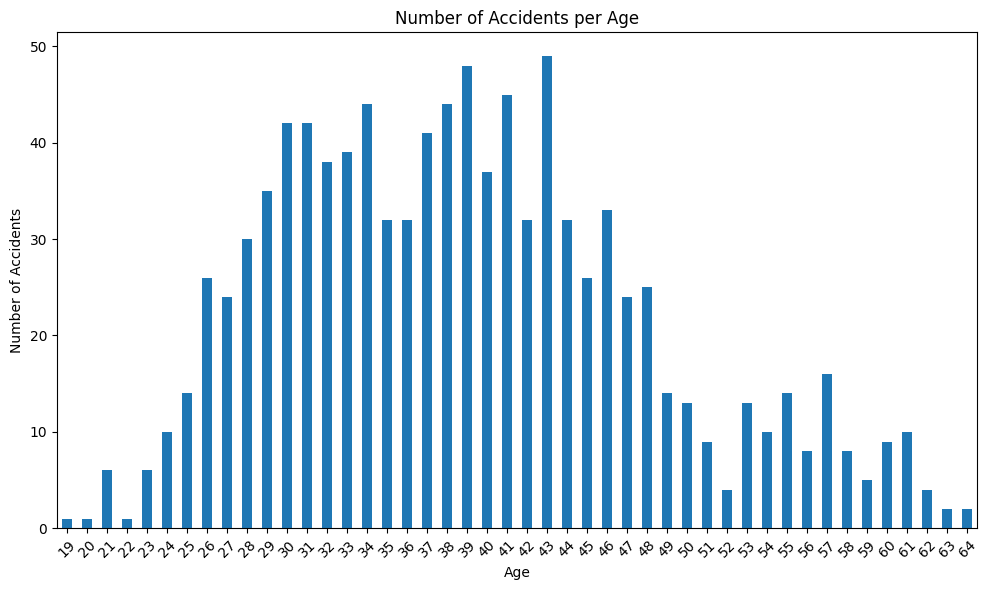

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it's already loaded.

# Group by 'age' and count the number of accidents
accidents_per_age = df.groupby('age').size()

# Plotting the result
accidents_per_age.plot(kind='bar', figsize=(10, 6))

plt.title('Number of Accidents per Age')
plt.xlabel('Age')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)  # Rotates the x labels to make them more readable
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


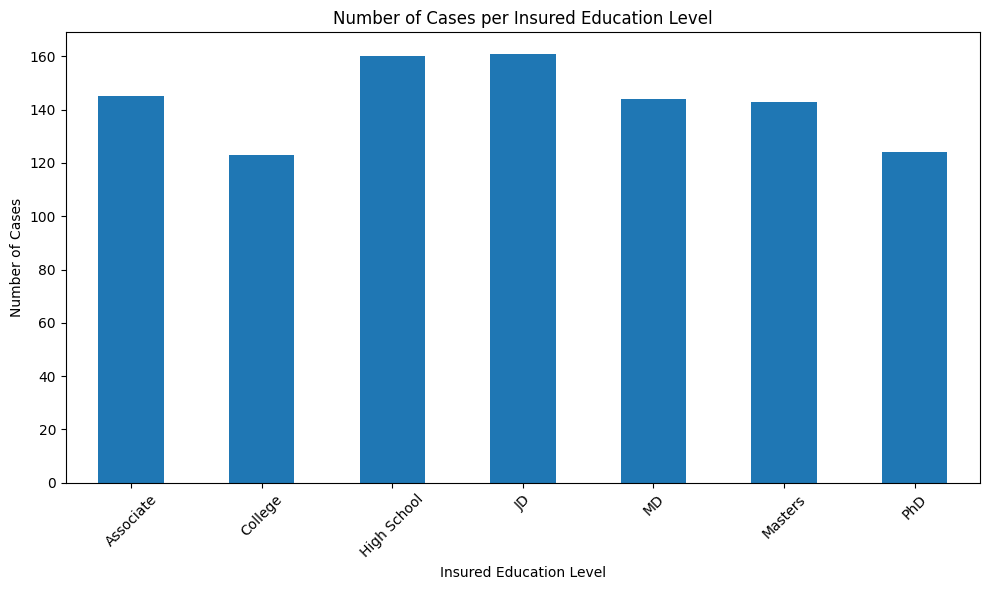

In [21]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and the column 'insured_education_level' exists.

# Group by 'insured_education_level' and count the occurrences
accidents_per_education_level = df.groupby('insured_education_level').size()

# Plotting the result as a bar graph
accidents_per_education_level.plot(kind='bar', figsize=(10, 6))

plt.title('Number of Cases per Insured Education Level')
plt.xlabel('Insured Education Level')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)  # Rotates the x labels for better readability
plt.tight_layout()  # Adjusts the plot to ensure everything fits within the figure area
plt.show()


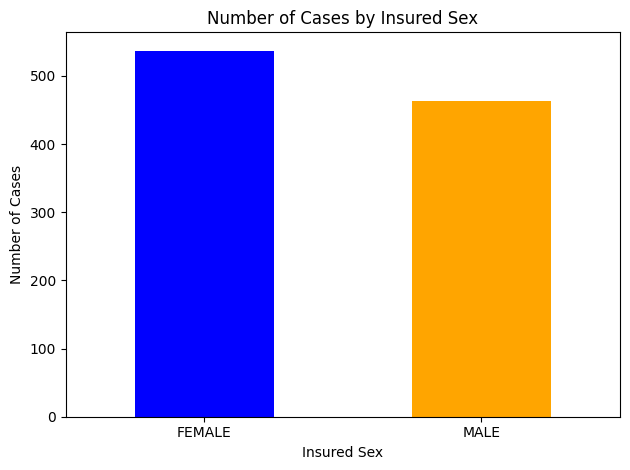

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it's already loaded.

# Group by 'insured_sex' and count the number of cases
cases_per_insured_sex = df.groupby('insured_sex').size()

# Plotting the result
cases_per_insured_sex.plot(kind='bar', color=['blue', 'orange'])

plt.title('Number of Cases by Insured Sex')
plt.xlabel('Insured Sex')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)  # The x labels (usually 'Male' and 'Female') are short, no need to rotate
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


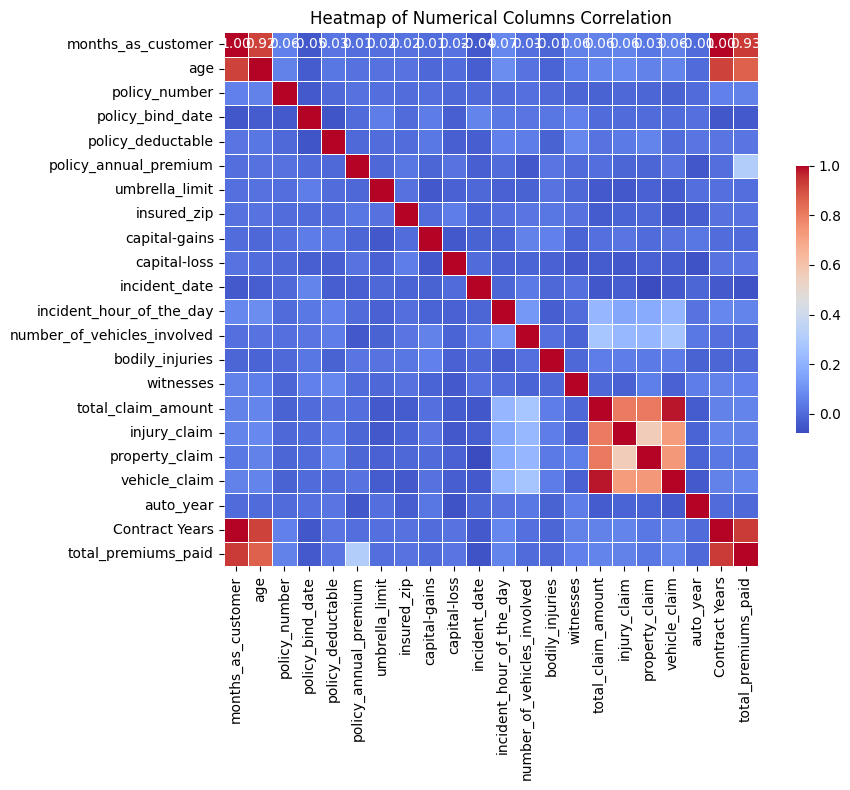

In [23]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it's already loaded
# Calculate the correlation matrix
corr = df.select_dtypes(include=['float64', 'int64']).corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, cbar_kws={"shrink": .5}, linewidths=.5)

plt.title('Heatmap of Numerical Columns Correlation')
plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.show()
